# <font color=blue><center>1. Retail Data Analysis</center></font>
> ## 1.1 What Is Retail Data Analysis?
Retail data analysis is an analysis of everything in your business, from sales and inventory to customer data. It enables businesses to effectively track customer actions, like their purchases and foot traffic in the store- whether done in person or online. Since the advent of e-commerce, retail business has changed a whole lot more, as are other types of businesses. Use of data to increase profits has been in high demands than ever before; retail stores, small and big, now keep every bit of data available to make their online presence even more valuable and to score new buyers, and retain their regulars. 

>Data is accessible at nearly every touchpoint that consumers and retailers interact nowadays—including both online and offline. As a result, Smal and Medium Business (SMB) retailers can use insight collected from data to prepare for future store planning needs, including marketing, employee management, inventory control and more. In fact, SMBs can be even more agile and nimble in rolling out their analytics efforts and react more quickly to leverage data into a competitive edge.
>## 1.2 Problem Statement
>Just like any other retail business fratenity, this superstore has tasked us with performing extensive data analysis to deliver or uncover hidden insights on how the company can increase its profits while minimizing the losses.
>## 1.3 About The Dataset
>The dataset we will use in this project can be found [here](https://data.world/stanke/sample-superstore-2018). We will dive deeper into the features involved in our data.
>## 1.4 Experimental Design
>We will use static data- dataset already available rather than real-time data from an IoT system.
>## 1.5 Software tools & Hardware Requirements: 
>- Jupyter Notebook, 
>- Python3 Liraries such as [NumPy](https://numpy.org/doc/stable/user/quickstart.html), [Pandas](https://pandas.pydata.org/docs/), [Matplotlib](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) and [Seaborn](https://seaborn.pydata.org/) 
>- Supervised Learning libraries such [Scikit-Learn](https://scikit-learn.org/stable/)
  ... will be exploited for the development and experimentation of the project.

---
# <font color=blue><center> 2. Loading Necessary Libraries & Data Ingestion</center></font>
> ## 2.1 Importing Neccessary Libraries

In [5]:
# For data cleaning/wrangling
import numpy as np      # vectors and matrices || Linear Algebra
import pandas as pd     # tables and data manipulations 

# Visualization Libraries
import matplotlib.pyplot as plt # plots
import seaborn as sns           # attractive plots

> ## 2.2 Data Ingestion

In [36]:
df = pd.read_csv("Sample - Superstore.csv")

In [37]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,11/8/17,11/11/17,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2017-152156,11/8/17,11/11/17,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


> ### $Observation$
- With the above snipped, we see that data ingestion was successful- we have checked the first 2 entries in the dataset just to get a feel of what we will be working with. 
- The columns are our tell-all, and some of them are straightforward while others are not so easy to decipher (understandably so).

--- 
# <font color=blue><center>3. Data Preprocessing</center></font>
> - Before moving on to analysing our data, let's first weed out some anomalies or anything that could hurt our data analysis and, possibly predictions. 
- We also want to have only the necessary features to work with at a later stage, so that would mean dropping those we wil deem unnecessary to our cause.

> ### Why preprocessing?
1. Real world data are generally
    - __Incomplete__: lacking attribute values, lacking certain attributes of interest, or containing only aggregate data
    - __Noisy__: containing errors or outliers
    - __Inconsistent__: containing discrepancies in codes or names
2. Tasks in data preprocessing
    - __Data cleaning__: fill in missing values, smooth noisy data, identify or remove outliers, and resolve inconsistencies.
    - __Data integration__: using multiple databases, data cubes, or files.
    - __Data transformation__: normalization and aggregation.
    - __Data reduction__: reducing the volume but producing the same or similar analytical results.
    - __Data discretization__: part of data reduction, replacing numerical attributes with nominal ones.

> - We will perform the above preprocessing tasks without explicitely stating so.
> - We already saw some entries in the dataset, let's go ahead and see what the columns mean and which ones can be dropped.

> ### Features/Columns

In [38]:
# Call columns
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

> - These are the columns we have in the dataframe and we can see right away which ones we can get rid of as they are not so important for our data analysis.
  - They are: 
      - `Row ID`
      - `Order ID`
      - `Customer ID`
      - `Customer Name`
      - `Postal Code`
      - `Region`
      - `Product ID`
      - `Product Name`

> ### Dropping Unnecessary Columns

In [39]:
# Drop Some Columns
df = df.drop(["Row ID", "Order ID", "Customer ID", "Customer Name", "Postal Code", "Product ID", "Product Name", "City"], axis=1)

In [40]:
# Check the first few entries again
df.head(2)

,Order Date,Ship Date,Ship Mode,Segment,Country,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,11/8/17,11/11/17,Second Class,Consumer,United States,Kentucky,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,11/8/17,11/11/17,Second Class,Consumer,United States,Kentucky,South,Furniture,Chairs,731.94,3,0.0,219.5820


> ### $Observation$
- We originally had 21 columns, and now we only have 13 left after dropping those we deem unnecesary.
- We can drop more depending on what we want to analyse moving forward but for now let's go ahead aand work with the ones we decided to keep.

> #### <CENTER>Column Descriptions</CENTER>
>|$Order Date$ | corresponds to the date on which a customer placed an order with the store. |
| :-| :-|
| $Ship Date$ | corresponds to the date on which an order was sent out to the customer who placed an order with the store.
|$Ship Mode$| The class of the shipment mode: first class or second class, each of which has different shipping speeds.
|$Segment$| Category of the consumer who placed an order- a regular consumer or another company(corporate purchase)?.
|$Country$| Country in which the consumer resides.
|$State$| State of customer's residency.
|$Region$| Region from which the cumstomer placed an order from.
|$Category$|Order category.
|$Sub-Category$|Order sub-category.
|$Sales	$|Total revenue from sales of that order.
|$Quantity$| Number of ordered items.
|$Discount$|Whether or not the customer got a discount with the items bought.
|$Profit$| Profit made from the purchased items

> ### Size of the dataset: How many entries are in our dataset?

In [41]:
# Number of samples and features
print("The Dataset has:")
rows, col = df.shape
print("Rows : %s, features : %s" % (rows, col))

The Dataset has:
Rows : 9994, features : 13


> ### Is there missing data?

In [51]:
# Check if there's missing data
# Turn it into a dataframe
pd.DataFrame(df.isnull().sum(), columns=["Number of Missing Values"]).T

,Order Date,Ship Date,Ship Mode,Segment,Country,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
Number of Missing Values,0,0,0,0,0,0,0,0,0,0,0,0,0


>### $Observation$
- We see that there are no missing entries in this dataset.

> ### Statistical Description of Numerical Entries in this Dataset

In [53]:
# Describe df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


> ### $Observation$
- Some biggest takeaways from the above:
    1. Minimum profit of -6599.978 was the biggest loss
    - Highest amount of profit ever made by the store was 8399.976
    - At one point sales hit the highest of 22638.48
    - Average profit is 234.26 while that of sales is 623.25
    - On average, customers order about 4 items
    - The highest number of items ordered was 14


> ### Get Info About Features of the Dataset
- We want to observe different datatypes under each column so we have an idea what we are working with. 

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    9994 non-null   object 
 1   Ship Date     9994 non-null   object 
 2   Ship Mode     9994 non-null   object 
 3   Segment       9994 non-null   object 
 4   Country       9994 non-null   object 
 5   State         9994 non-null   object 
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1015.1+ KB


> ### $Observation$
- We do notice different data types under each column
- We also notice that the two columns that are supposed to be of date format are classified as `object` data type; we have to correct that as we want to analyse the dates too at the later stage.

---
> ### Convert non-date columns to datetime stamp

In [56]:
df.head(1)

,Order Date,Ship Date,Ship Mode,Segment,Country,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,11/8/17,11/11/17,Second Class,Consumer,United States,Kentucky,South,Furniture,Bookcases,261.96,2,0.0,41.9136


In [63]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date']  = pd.to_datetime(df['Ship Date'])

> ### Check Dataframe Info Again

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    9994 non-null   datetime64[ns]
 1   Ship Date     9994 non-null   datetime64[ns]
 2   Ship Mode     9994 non-null   object        
 3   Segment       9994 non-null   object        
 4   Country       9994 non-null   object        
 5   State         9994 non-null   object        
 6   Region        9994 non-null   object        
 7   Category      9994 non-null   object        
 8   Sub-Category  9994 non-null   object        
 9   Sales         9994 non-null   float64       
 10  Quantity      9994 non-null   int64         
 11  Discount      9994 non-null   float64       
 12  Profit        9994 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 1015.1+ KB


> ### $Observation$
- We do see that we successfully managed to convert the date columns into datetime datatype, as they were originally supposed to be. 

> Now that we have a general knowledge of our dataset, let's go ahead and uncover some hidden insights

# <font color=blue><center>4. Exploratory Data Analysis</center></font>
> - We will formulate random questions and try to answer them with data visualilization and analysis as we go along.

>## 4.1 Geographical Segmentation Analysis
- #### From which countries do our buyers come from?

In [87]:
# Get Unique values under Country column
pd.DataFrame(df.Country.unique(), columns=["Countries"])

,Countries
0,United States


> ### $Analysis$
- All the buyers are based in the United States

> - #### How many states are our customers from?

In [96]:
# Get Unique values under State column
pd.DataFrame(df.State.unique(), columns=["States"]).count()

States    49
dtype: int64

> ### $Analysis$
- Our customers come from almost all states.

> #### Which states saw the most sales?
- We will make use of Maps and spread out data based on sales per state, i.e. states from which buyers were based and had their products shipped to them. 

In [283]:
%%HTML
<div class='tableauPlaceholder' id='viz1621996077222' style='position: relative'><noscript><a href='#'><img alt='Sales Per State ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Sa&#47;Sales_Analysis_16218381582000&#47;sales_per_state&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Sales_Analysis_16218381582000&#47;sales_per_state' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Sa&#47;Sales_Analysis_16218381582000&#47;sales_per_state&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1621996077222');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

> ### $Analysis$ $and$ $keys$
- The bluer the state, the more the sales, and the more red the state, the less the sales
- California had the highest sales (457,688), followed by New York with 310,876

> #### Which States were most profitable?
- #### Let's vizualize profitability with each state

In [284]:
%%HTML
<div class='tableauPlaceholder' id='viz1621928625977' style='position: relative'><noscript><a href='#'><img alt='Profitability Per State ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Sa&#47;Sales_Analysis_16218381582000&#47;profitability_per_state&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Sales_Analysis_16218381582000&#47;profitability_per_state' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Sa&#47;Sales_Analysis_16218381582000&#47;profitability_per_state&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1621928625977');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

> ### $Analysis$ $and$ $keys$
- The bluer and bigger the dot in each state, the more the profits, 
- The more bigger and red the do the less the profits or an indication of a loss, 
- California had the highest profit (76,381), followed by New York with 74,039.
- One interesting insight:
    - Texas had the third highest sales, but made a loss. We will try investigate why. 


> ## Regional Sales and Profit Analysis 
- Let as take a look at the sales and profitability of each region.

In [368]:
region_sales = df.groupby("Region").sum()[["Sales"]]
region_sales

,Sales
Region,
Central,501239.8908
East,678781.2400
South,391721.9050
West,725457.8245


In [231]:
region_profits = df.groupby("Region").sum()[["Profit"]]
region_profits

,Profit
Region,
Central,39706.3625
East,91522.7800
South,46749.4303
West,108418.4489


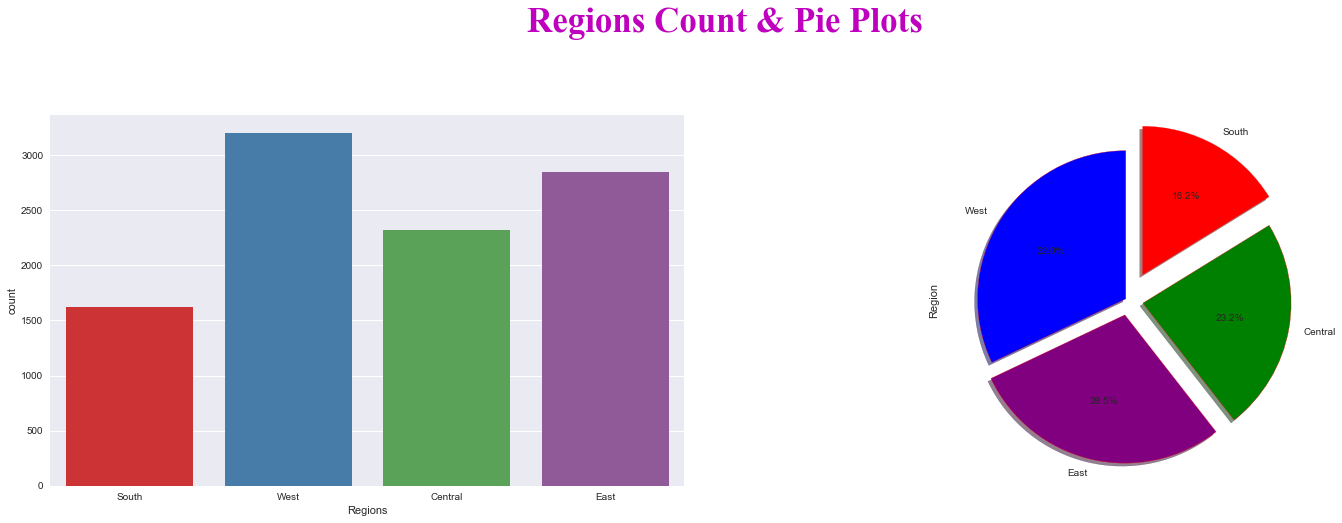

In [230]:
plt.style.use('seaborn')
plt.figure(figsize=(15,10))

plt.suptitle("Regions Count & Pie Plots", fontname = "Times New Roman", size = 35, color="m")

# Count Plot
plt.subplot(2,2,1)
sns.countplot(x="Region", data = df, palette = "Set1")
plt.xlabel("Regions")

# Pie Plot
plt.subplot(2,2,2)
colors = ["blue", "purple", "green", "red"]
explode = (0.02, 0.1, 0.1, 0.2)
labels = 'West', 'East', 'Central', 'South'
df["Region"].value_counts().plot.pie(y="Region", labels=labels, explode = explode, figsize=(25,15), autopct='%1.1f%%',
                                    startangle = 90, shadow=True, wedgeprops={'edgecolor': 'red'}, colors=colors)
#plt.tight_layout()

> ### $Analysis$
- About 32% of our customers are in the Western Region
- The second largest percentage of our customers are based in the central region
- We have the lowest number of buyers from the South
- We also have 28.5% of our customers in the Eastern region. 

In [263]:
region_sales_and_profit = df.groupby("Region").sum()[["Sales", "Profit"]] 
# Turn into a Dataframe
region_sales_and_profit_df = pd.DataFrame(region_sales_and_profit)
region_sales_and_profit_df

,Sales,Profit
Region,,
Central,501239.8908,39706.3625
East,678781.2400,91522.7800
South,391721.9050,46749.4303
West,725457.8245,108418.4489


> - The above dataframe shows grouped regional sales and profits.

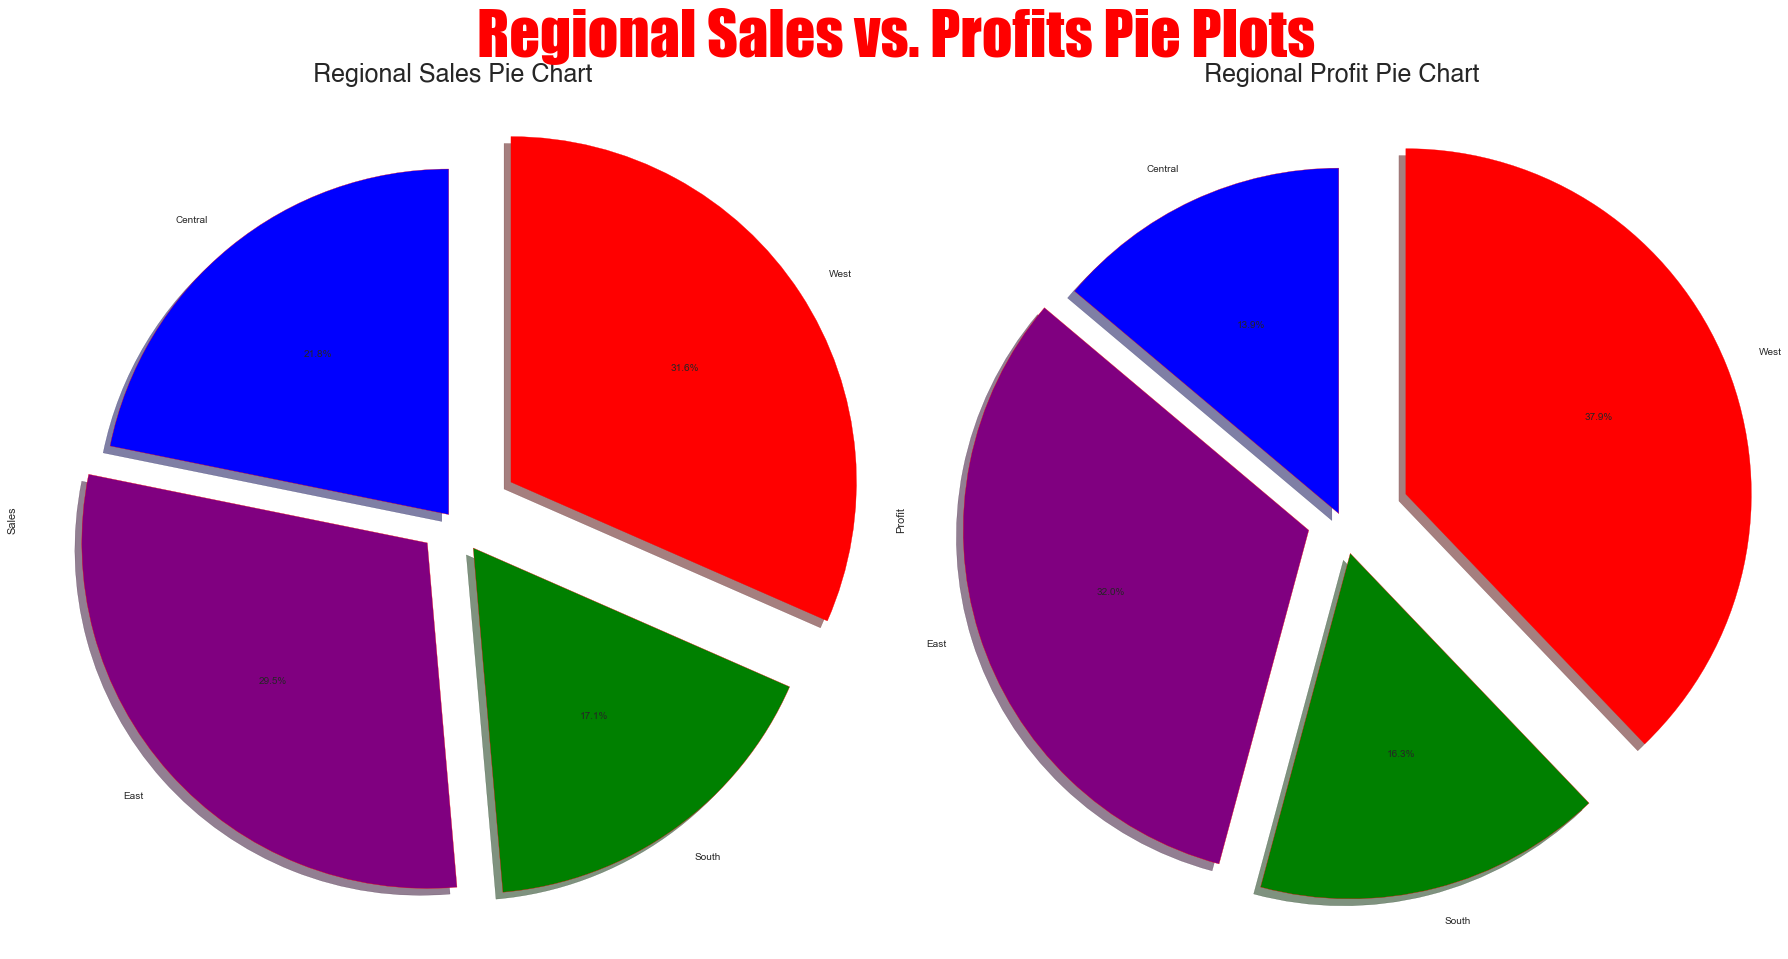

In [347]:
plt.subplot(2, 2, 1)
plt.suptitle("Regional Sales vs. Profits Pie Plots", size=60, fontname = "Impact", color = "red")
# Regional Sales Pie Plot
colors = ["blue", "purple", "green", "red"]
explode = (0.02, 0.1, 0.1, 0.2)
region_sales_and_profit_df["Sales"].plot.pie(explode = explode, figsize=(20,7), autopct='%1.1f%%',
                                    startangle = 90, shadow=True, wedgeprops={'edgecolor': 'red'}, colors=colors)
plt.title("Regional Sales Pie Chart", size = 25, fontname = "Helvetica")


plt.subplot(2, 2, 2)
# Regional Profits Pie Plot
colors = ["blue", "purple", "green", "red"]
explode = (0.02, 0.1, 0.1, 0.2)
region_sales_and_profit_df["Profit"].plot.pie(explode = explode, figsize=(25,30), autopct='%1.1f%%',
                                    startangle = 90, shadow=True, wedgeprops={'edgecolor': 'r'}, colors=colors)
plt.title("Regional Profit Pie Chart", size = 25, fontname = "Helvetica")

plt.tight_layout()

> ### $Analysis$
- Central Region had 21.8% of sales, but 13.9% of profits
- Eastern Region had 29.5% of sales, and 32.0% of profits
- Southern Region had 17.1% of sales, and 16.3% of profits
- Western Region had 31.6% of sales and 37.9% of profits
    - We do observe that the more the sales, the more profit the business made
    - This makes sense, we expect to make more profit where we sell more
    - Southern Region saw the least sales; hence the least profit- this is the region that the business should improve in: do more marketing perharps. 

> ## 4.2 Shipping Analysis
- Let us try analyse the efficiency or responsiveness of our business in attending to customers orders
- We also will look at the shipment modes that the business utilizes 
    - We know that the more responsive the business is in fulfilling the orders, the more customers it will retain and attract. 

In [317]:
# Calculate shipment days and turn it into a dataframe
ship_df = pd.DataFrame((df["Ship Date"] - df["Order Date"]), columns = ["Shipped After"])
ship_df.head()

,Shipped After
0,3 days
1,3 days
2,4 days
3,7 days
4,7 days


> ### The longest it took to ship an order

In [320]:
ship_df.max()

Shipped After   7 days
dtype: timedelta64[ns]

> ### $Analysis$
-  The longest it ever took to ship the order to the customer was 7 days (1 week).

> ### The shortest it took to ship an order

In [327]:
ship_df.min()

Shipped After   0 days
dtype: timedelta64[ns]

> ### $Analysis$
- Some orders were shipped within same day of ordering

> ### The Average Shipping Time After Placing An Order

In [328]:
ship_df.mean()

Shipped After   3 days 23:00:12.247348409
dtype: timedelta64[ns]

> ### $Analysis$
- On average, the business ships to customers within 3 days after order placement.
> #### Recommendation: - <font color=red>Reduce shipment days after customers have placed an order.
    
> ### Available Shipping Modes
- Let's take a look at the available shipping methods for this business

In [365]:
pd.DataFrame(df["Ship Mode"].unique(), columns = ["Shipping Methods"])

,Shipping Methods
0,Second Class
1,Standard Class
2,First Class
3,Same Day


> - We see that we have 4 different shipping modes:
    1. First Class
    2. Second Class
    3. Standard Class
    4. Same Day

> ### Shipping Modes Profitability
- Which shipping method was more profitable? Let's find out:

In [346]:
ship_sales_and_profit = df.groupby("Ship Mode").sum()[["Sales", "Profit"]] 
# Turn into a Dataframe
ship_sales_and_profit_df = pd.DataFrame(ship_sales_and_profit)
ship_sales_and_profit_df

,Sales,Profit
Ship Mode,,
First Class,3.514284e+05,48969.8399
Same Day,1.283631e+05,15891.7589
Second Class,4.591936e+05,57446.6354
Standard Class,1.358216e+06,164088.7875


Text(0.5, 1.0, 'Shipment Mode Profit Chart')

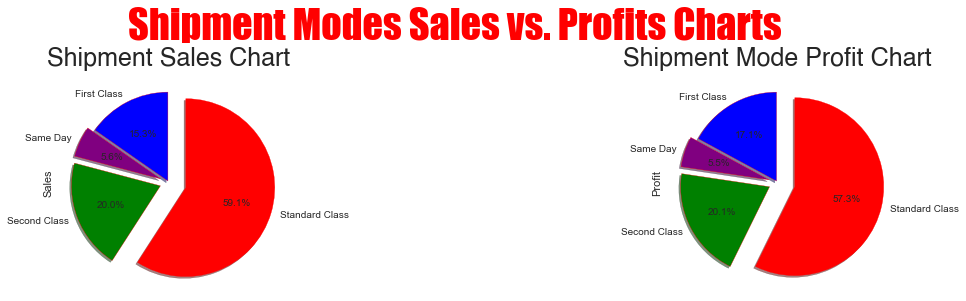

In [356]:
plt.subplot(2, 2, 1)
plt.suptitle("Shipment Modes Sales vs. Profits Charts", size=40, fontname = "Impact", color = "red")

# Ship Mode Sales Pie Plot
colors = ["blue", "purple", "green", "red"]
explode = (0.02, 0.1, 0.1, 0.2)
ship_sales_and_profit_df["Sales"].plot.pie(explode = explode, figsize=(20,7), autopct='%1.1f%%',
                                    startangle = 90, shadow=True, wedgeprops={'edgecolor': 'red'}, colors=colors)
plt.title("Shipment Sales Chart", size = 25, fontname = "Helvetica")


plt.subplot(2, 2, 2)
# Ship Mode Profits Pie Plot
colors = ["blue", "purple", "green", "red"]
explode = (0.02, 0.1, 0.1, 0.2)
ship_sales_and_profit_df["Profit"].plot.pie(explode = explode, figsize=(20,9), autopct='%1.1f%%',
                                    startangle = 90, shadow=True, wedgeprops={'edgecolor': 'r'}, colors=colors)
plt.title("Shipment Mode Profit Chart", size = 25, fontname = "Helvetica")

#plt.tight_layout()

> ### Hypothesis:
- __The more sales for each shipping mode, the more the profits__.

> ### $Analysis$
- Most shoppers prefer Standard Class Shipping, followed by Second class.
- So most shoppers were not in a rush to get their orders delivered same day, hence only 5.6% sales of Same Day Delivery mode. 
    - We do observe that the more the sales, the more profit the business made, conforming to our original hypothesis
    - This makes sense, we expect to make more profit where we sell more

> ## 4.3 Customer Segmentation Analysis
- Customer segmentation is the process of separating customers into groups on the basis of their shared behavior or other attributes. The groups should be homogeneous within themselves and should also be heterogeneous to each other.
-  Customer segmentation is useful in understanding what demographic and psychographic sub-populations there are within our customers in a business case.
- The overall aim of this process is to identify high-value customer base i.e. customers that have the highest growth potential or are the most profitable.
- We will try understand the classes of our customers
- We will also try understand loyal customer class base- to see who we sell most to
- We want to undertand the sales batch and profitability of each group

> #### What are the avaialble categories of buyers in our superstore?

In [369]:
# Get unique segments in the dataset
pd.DataFrame(df.Segment.unique(), columns=["Segmentations"])

,Segmentations
0,Consumer
1,Corporate
2,Home Office


> ### $Analysis$
- We have 3 different segments of buyers:
    1. General Consumers
    2. Corporate buyers
    3. Home Office buyers

> ### Quantity Analsysis in each Segment

In [424]:
seg = df.groupby("Segment").sum()[["Quantity", "Sales"]] 

,Quantity,Sales
Segment,,
Consumer,19521,1.161401e+06
Corporate,11608,7.061464e+05
Home Office,6744,4.296531e+05


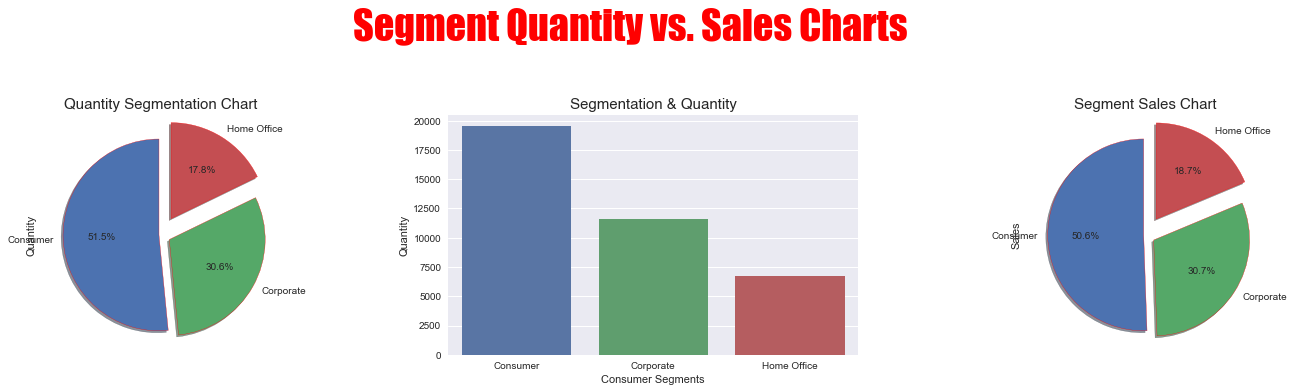

<Figure size 1800x720 with 0 Axes>

In [456]:
plt.figure(figsize=(25, 15))
plt.suptitle("Segment Quantity vs. Sales Charts", size=40, fontname = "Impact", color = "red")


# Quantity Segmentation Pie Plot
plt.subplot(3, 3, 1)
#colors = ["magenta", "yellow", "cyan"]
explode = (0.02, 0.1, 0.2)
seg["Quantity"].plot.pie(explode = explode, autopct='%1.1f%%', startangle = 90, shadow=True,
                         wedgeprops={'edgecolor': 'red'})
plt.title("Quantity Segmentation Chart", size = 15, fontname = "Helvetica")

plt.subplot(3, 3, 2)
# Barplot
sns.barplot(x = 'Segment', y = 'Quantity', data = df, estimator = sum, ci=None)
# Add titles (main and on axis)
plt.title("Segmentation & Quantity", size = 15, fontname = "Helvetica")
plt.xlabel("Consumer Segments")


# Quantity Segmentation Pie Plot
plt.subplot(3, 3, 3)
#colors = ["magenta", "yellow", "cyan"]
explode = (0.02, 0.1, 0.2)
seg["Sales"].plot.pie(explode = explode, autopct='%1.1f%%', startangle = 90, shadow=True, 
                      wedgeprops={'edgecolor': 'red'})
plt.title("Segment Sales Chart", size = 15, fontname = "Helvetica")
plt.figure(figsize=(25, 10))

# Call Seg
seg

> ### $Analysis$
- 50% of the customers were general Consumers
- The superstore also served Corporate market as the second largest group
- Most orders came from general Consumers

> ## 4.4 Stock Category Analysis
- Here we go ahead to dig deeper into classifications of stock sold by the store
- #### What are the available classes of goods in this store?

In [472]:
pd.DataFrame(df.Category.unique(), columns = ["Category"])

,Category
0,Furniture
1,Office Supplies
2,Technology


In [479]:
cat = df.groupby("Category").sum()[["Sales", "Profit", "Quantity"]] 
cat

,Sales,Profit,Quantity
Category,,,
Furniture,741999.7953,18451.2728,8028
Office Supplies,719047.0320,122490.8008,22906
Technology,836154.0330,145454.9481,6939


<Figure size 1800x720 with 0 Axes>

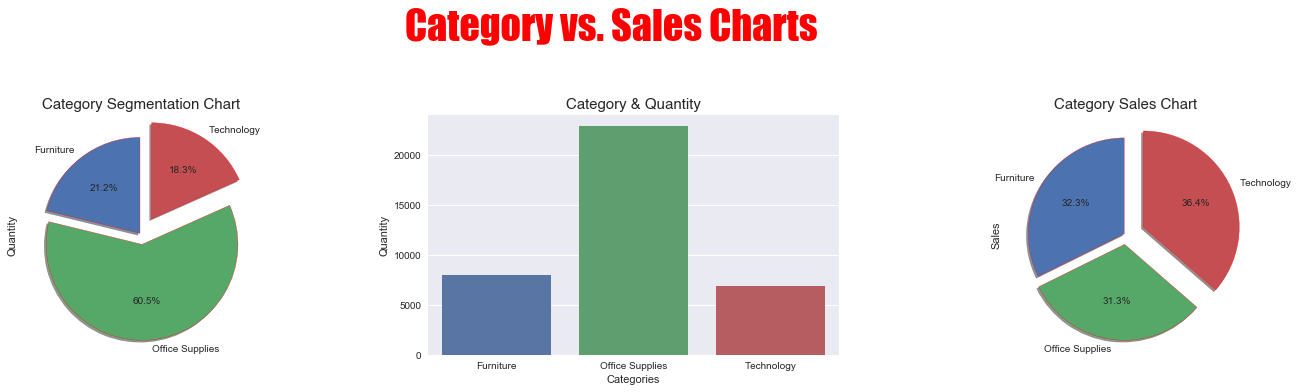

<Figure size 1800x720 with 0 Axes>

In [481]:
plt.figure(figsize=(25, 15))
plt.suptitle("Category vs. Sales Charts", size=40, fontname = "Impact", color = "red")


# Quantity Segmentation Pie Plot
plt.subplot(3, 3, 1)
#colors = ["magenta", "yellow", "cyan"]
explode = (0.02, 0.1, 0.2)
cat["Quantity"].plot.pie(explode = explode, autopct='%1.1f%%', startangle = 90, shadow=True,
                         wedgeprops={'edgecolor': 'red'})
plt.title("Category Segmentation Chart", size = 15, fontname = "Helvetica")

plt.subplot(3, 3, 2)
# Barplot
sns.barplot(x = 'Category', y = 'Quantity', data = df, estimator = sum, ci=None)
# Add titles (main and on axis)
plt.title("Category & Quantity", size = 15, fontname = "Helvetica")
plt.xlabel("Categories")


# Quantity Segmentation Pie Plot
plt.subplot(3, 3, 3)
#colors = ["magenta", "yellow", "cyan"]
explode = (0.02, 0.1, 0.2)
cat["Sales"].plot.pie(explode = explode, autopct='%1.1f%%', startangle = 90, shadow=True, 
                      wedgeprops={'edgecolor': 'red'})
plt.title("Category Sales Chart", size = 15, fontname = "Helvetica")
plt.figure(figsize=(25, 10))


> ### $Ananlysis$
- The famous category was Office Supplies, but it looks like Technology sold more- this could be for furious reasons: 
    - Office supplies may not be as expensive compared to technology goods. 
    - Office supplies get ordered in large quantities hence their count will be higher than any category

In [482]:
df.head()

,Order Date,Ship Date,Ship Mode,Segment,Country,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,2017-11-08,2017-11-11,Second Class,Consumer,United States,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,2017-11-08,2017-11-11,Second Class,Consumer,United States,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,2017-06-12,2017-06-16,Second Class,Corporate,United States,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,2016-10-11,2016-10-18,Standard Class,Consumer,United States,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,2016-10-11,2016-10-18,Standard Class,Consumer,United States,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


> ## 4.5 Sales and Profit Trends
> #### Now to the big question: Is this business growing in terms of sales and profits?
> ### Quarterly Sales Trends

In [485]:
%%HTML
<div class='tableauPlaceholder' id='viz1622092849889' style='position: relative'><noscript><a href='#'><img alt='Quarterly Sales &amp; Profit Trend  ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Sa&#47;Sales_Analysis_16218381582000&#47;quarterly_sales_trends&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Sales_Analysis_16218381582000&#47;quarterly_sales_trends' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Sa&#47;Sales_Analysis_16218381582000&#47;quarterly_sales_trends&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1622092849889');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [504]:
# Create a Quarter Column
df['Quarter'] = pd.PeriodIndex(df['Order Date'], freq = 'Q')
df.head(1)

,Order Date,Ship Date,Ship Mode,Segment,Country,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Quarter
0,2017-11-08,2017-11-11,Second Class,Consumer,United States,Kentucky,South,Furniture,Bookcases,261.96,2,0.0,41.9136,2017Q4


> ### Quarterly Sales Trends for Stock Segments
- Sales Trends for:-
    1. Consumer
    2. Corporate
    3. Home Office

Text(0.5, 0, 'Quarters')

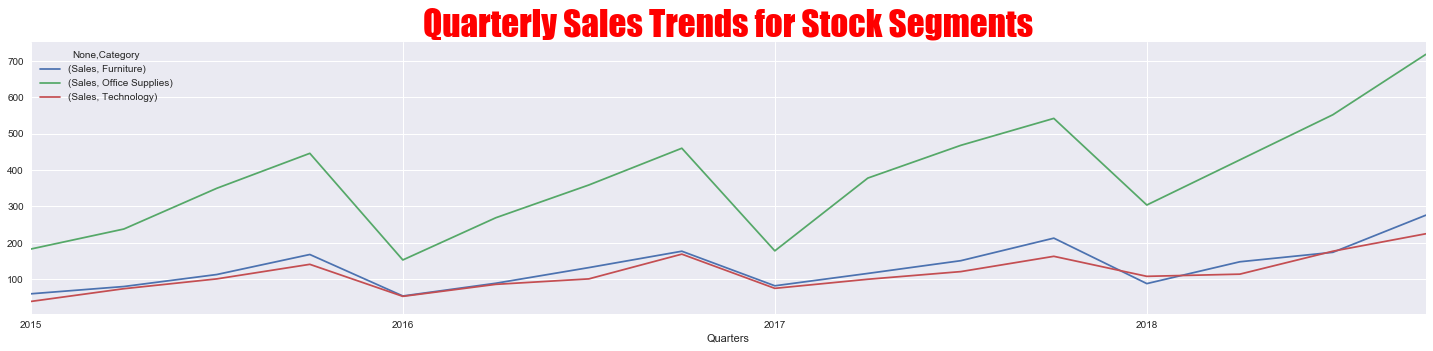

In [538]:
fig, ax = plt.subplots(figsize=(25,5))
# Plot Quaterly Sales for Stock Segmentation
df.groupby(["Quarter", "Category"]).count()[['Sales']].unstack().plot(ax=ax)
plt.title("Quarterly Sales Trends for Stock Segments", size = 35, fontname = "Impact", color='r')
plt.xlabel("Quarters")

Text(0.5, 0, 'Quarters')

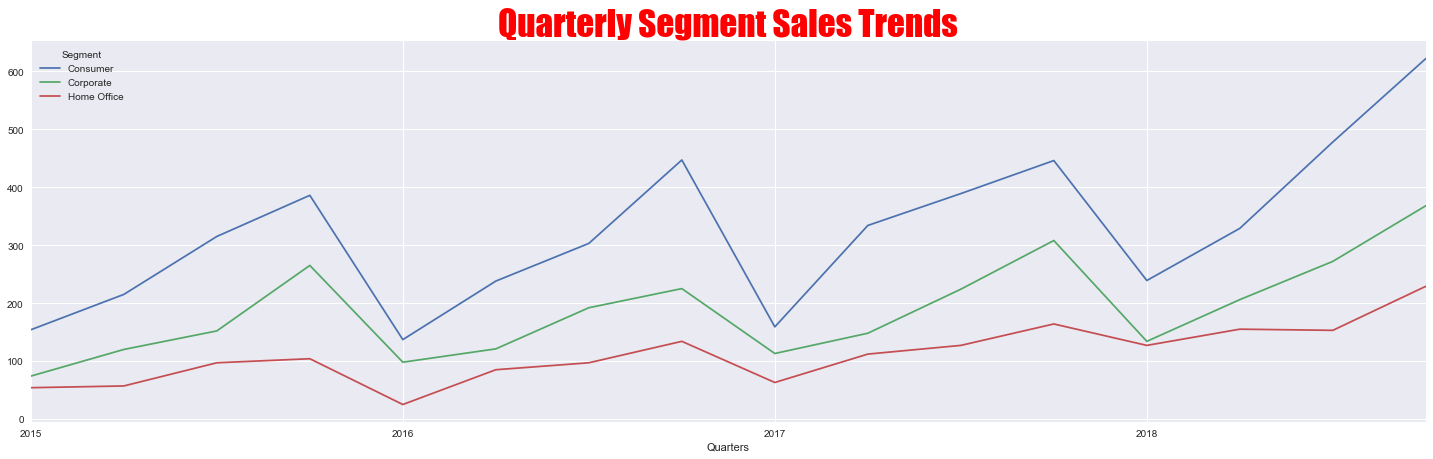

In [541]:
fig, ax = plt.subplots(figsize=(25,7))
# Plot Quaterly Sales for Stock Segmentation
df.groupby(["Quarter", "Segment"]).count()['Sales'].unstack().plot(ax=ax)
plt.title("Quarterly Segment Sales Trends", size = 35, fontname = "Impact", color='r')
plt.xlabel("Quarters")


> ## 4.6 Dashboard

In [542]:
%%HTML
<div class='tableauPlaceholder' id='viz1622098441377' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Sa&#47;Sales_Analysis_16218381582000&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Sales_Analysis_16218381582000&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Sa&#47;Sales_Analysis_16218381582000&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1622098441377');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='650px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='650px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='1027px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>